<a href="https://colab.research.google.com/github/XimenaRamirezA/AI-FIME-2024/blob/ACTIVIDADES/AI-FIME-2024%20/ACTIVIDADES/Tarea_7_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 7: Convolutional Neural Network**

Team:

*   Eugenia Lopez Silva 1994028
*   Ximena Montserrat Ramirez Aguilar 1952503
*   Jan Carlos Morales Rivera 1905790

NI-N3 Verano Inteligencia Artificial FIME-2024

**Step 1: Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.datasets import mnist
from random import randint


**Step 2: Import data**

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 460.0, test_images / 50.0

In [4]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


**Step 3: Preprocessing**

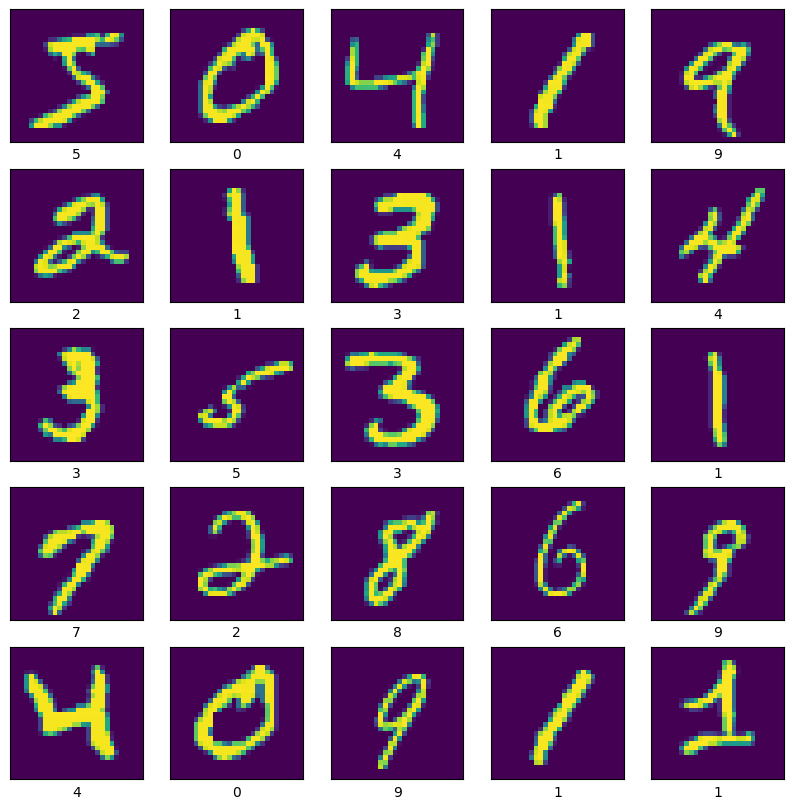

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

**Step 4: Model selection, setup and training**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


print(train_images.shape)

(60000, 28, 28, 1)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 64)                495680    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, batch_size=800,
                    validation_data=(test_images, test_labels))

Epoch 1/4
75/75 [==============================] - 52s 674ms/step - loss: 1.0522 - accuracy: 0.7697 - val_loss: 0.9360 - val_accuracy: 0.8753
Epoch 2/4
75/75 [==============================] - 50s 669ms/step - loss: 1.3880 - accuracy: 0.6951 - val_loss: 2.2858 - val_accuracy: 0.4578
Epoch 3/4
75/75 [==============================] - 49s 656ms/step - loss: 2.3022 - accuracy: 0.4370 - val_loss: 2.3017 - val_accuracy: 0.4843
Epoch 4/4
75/75 [==============================] - 50s 672ms/step - loss: 2.3022 - accuracy: 0.4289 - val_loss: 2.3017 - val_accuracy: 0.4840


**Step 5: Test the model**

313/313 - 3s - loss: 2.3017 - accuracy: 0.4840 - 3s/epoch - 11ms/step


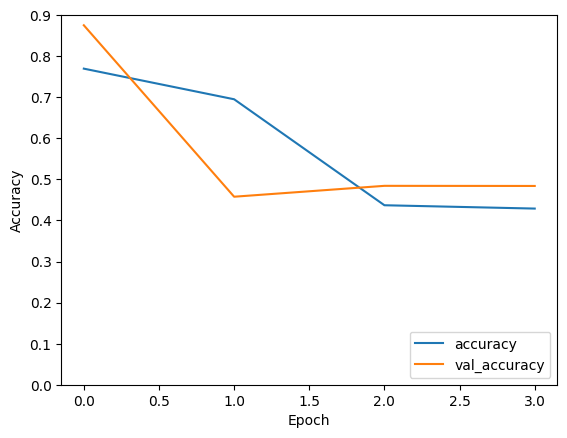

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,0.9])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.48399999737739563


1/1 [==============================] - 0s 118ms/step
Predict number: 4
Real number: 4


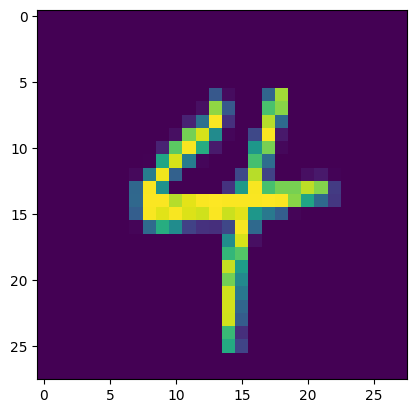

1/1 [==============================] - 0s 21ms/step
Predict number: 0
Real number: 0


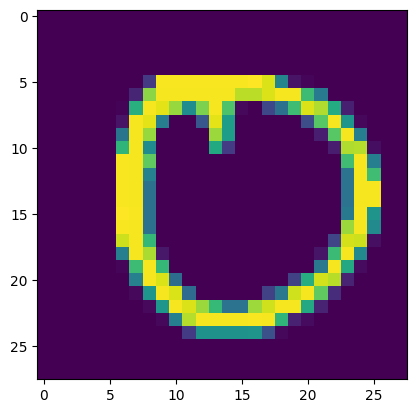

1/1 [==============================] - 0s 22ms/step
Predict number: 1
Real number: 9


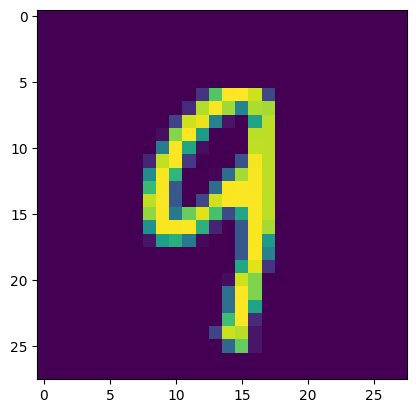

1/1 [==============================] - 0s 23ms/step
Predict number: 1
Real number: 1


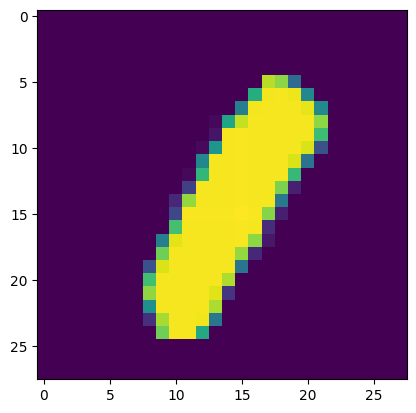

1/1 [==============================] - 0s 22ms/step
Predict number: 1
Real number: 3


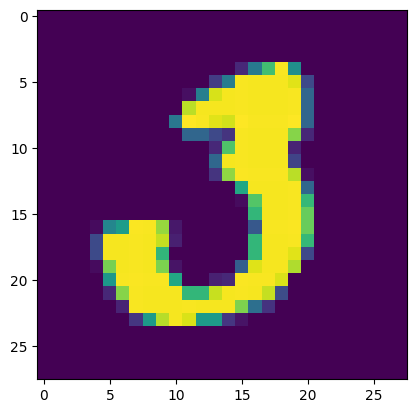

1/1 [==============================] - 0s 22ms/step
Predict number: 1
Real number: 9


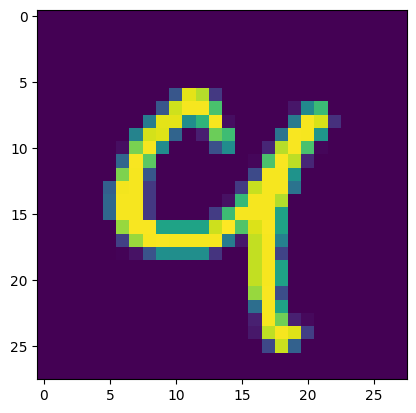

1/1 [==============================] - 0s 24ms/step
Predict number: 0
Real number: 0


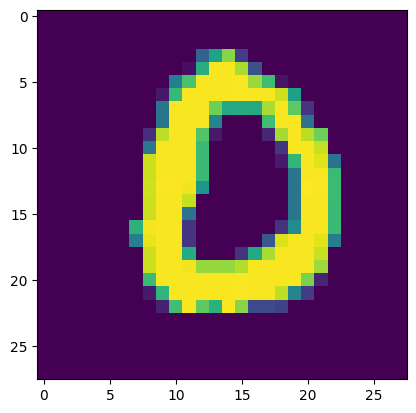

1/1 [==============================] - 0s 22ms/step
Predict number: 1
Real number: 9


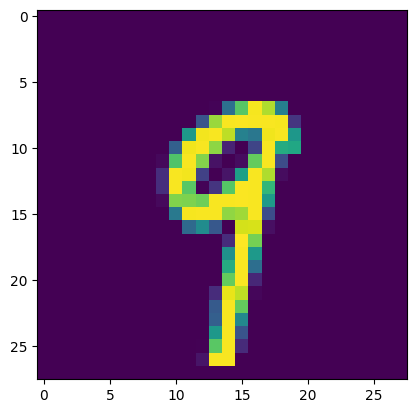

1/1 [==============================] - 0s 23ms/step
Predict number: 1
Real number: 1


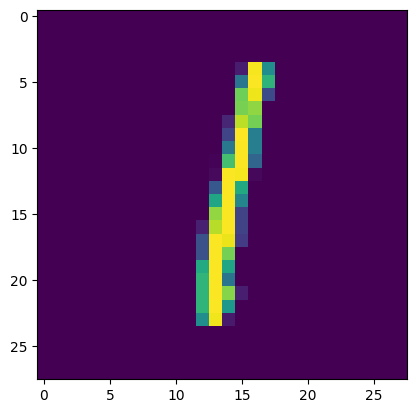

1/1 [==============================] - 0s 21ms/step
Predict number: 1
Real number: 9


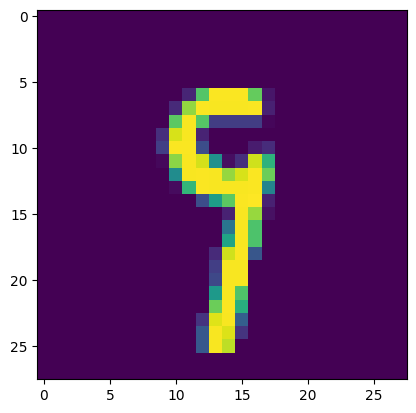

1/1 [==============================] - 0s 25ms/step
Predict number: 1
Real number: 4


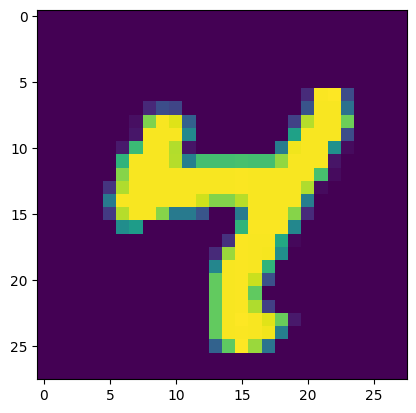

1/1 [==============================] - 0s 21ms/step
Predict number: 1
Real number: 3


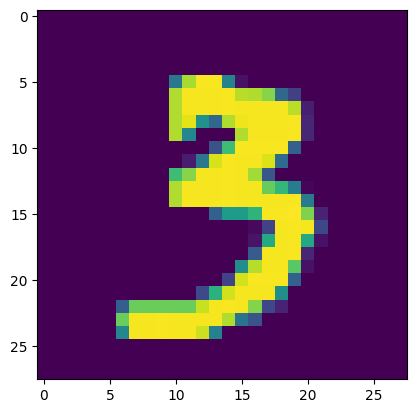

1/1 [==============================] - 0s 22ms/step
Predict number: 6
Real number: 6


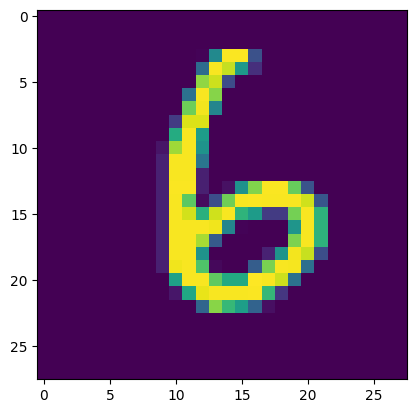

1/1 [==============================] - 0s 22ms/step
Predict number: 1
Real number: 1


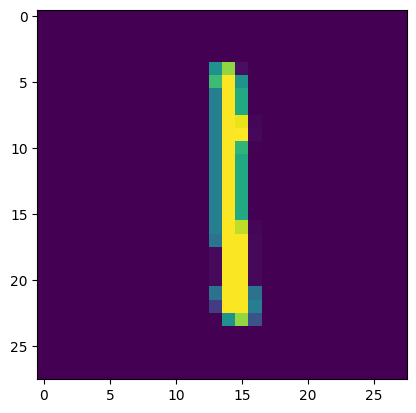

1/1 [==============================] - 0s 21ms/step
Predict number: 5
Real number: 5


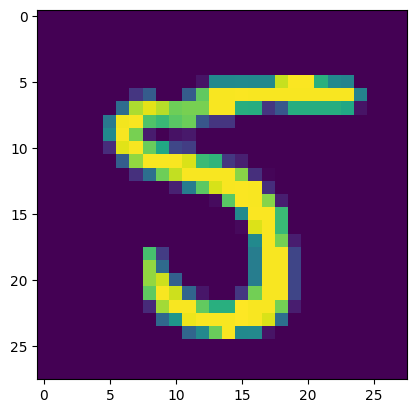

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, steps=5)

for x in range(15):


    i = randint(0, len(test_images))

    predict = np.argmax(model.predict(test_images[i:i+1]))

    print("Predict number:", predict)
    print("Real number:", test_labels[i])
    plt.imshow(test_images[i])
    plt.show()